<table align="center" width=110%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=6px>
                    <b>
                        LAPTOP PRICE PREDICTION
        <br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Abstract
In today's dynamic market, accurately predicting laptop prices is crucial for both consumers and sellers. This study aims to develop a data-driven approach utilizing machine learning algorithms to forecast laptop prices effectively. By analyzing various attributes such as brand, specifications, market trends, and technological advancements, the proposed model seeks to provide reliable price predictions. The objective is to empower stakeholders with actionable insights for decision-making, including purchasing, pricing strategies, inventory management, and product development.

# Problem Statement
The laptop market is characterized by a multitude of factors influencing prices, including brand reputation, hardware specifications, market demand, and technological advancements. However, accurately forecasting laptop prices remains challenging due to the complexity and variability of these factors. Traditional pricing methods often lack precision and fail to adapt to evolving market dynamics. Therefore, there is a critical need for a data-driven approach leveraging machine learning algorithms to develop a robust predictive model capable of generating accurate price forecasts for laptops.

# Dataset Description

1. Company : Name of the Company

2. TypeName : Type of laptop('Notebook', 'Gaming', 'Ultrabook', '2 in 1 Convertible', 'Workstation',
       'Netbook')

3. Inches : Size of the laptop(floating value)

4. ScreenResolution : The resolution of the laptop screen.

5. Cpu : The processor (CPU) specifications of the laptop.

6. Ram : The amount of RAM (random-access memory) in the laptop.

7. Memory : The storage capacity or type of memory (e.g., SSD, HDD) in the laptop.

8. Gpu : The graphics processor (GPU) specifications of the laptop.

9. OpSys : The operating system installed on the laptop.

10. Weight : The weight of the laptop, usually in kilograms or pounds.

11. Price : The price of the laptop, which is the target variable for prediction.

# Libraries

In [137]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import 'math'
import math

# import subpackage of 'Matplotlib'
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# Load Dataset

In [2]:
data = pd.read_csv("laptop_data.csv")

In [3]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Data Preprocessing

## Check the Dataset and Null Values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


#### Shape of the Dataset

In [5]:
data.shape

(1303, 12)

#### Checking Null values

In [6]:
print(data.isnull().sum())
print("-"*50)

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64
--------------------------------------------------


**Observation:-** \
There is no null values in the dataset

#### Checking duplicate values 

In [7]:
print(data.duplicated().sum())
print("-"*50)

0
--------------------------------------------------


**Observation:-** \
There is no duplicate values in the dataset

#### Unique Values 

In [8]:
data.nunique()

Unnamed: 0          1303
Company               19
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price                791
dtype: int64

`Unnamed` is unnecessary column which we gonna drop  

**Dropping `Unnamed` column**

In [9]:
data.drop("Unnamed: 0" , axis = 1, inplace = True)

**Checking Number of unique values and value_counts**

In [10]:
for i in data.columns:
    print('Number of unique Values in',i,'are -',data[i].nunique(),'\n')
    print('Counts of each value in',i,'-\n' , data[i].value_counts() , '\n\n','-'*50,'\n','-'*50,'\n\n' )

Number of unique Values in Company are - 19 

Counts of each value in Company -
 Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64 

 -------------------------------------------------- 
 -------------------------------------------------- 


Number of unique Values in TypeName are - 6 

Counts of each value in TypeName -
 Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64 

 -------------------------------------------------- 
 -------------------------------------------------- 


Number of unique Values in Inches are - 18 

Counts of each value in Inches -
 15

**Removing `GB` from Ram column** \
**Removing `kg` from Weight column** 

In [11]:
data["Ram"] = data["Ram"].str.replace("GB","")
data["Weight"] = data["Weight"].str.replace("kg","")

In [12]:
data.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


**Changing Datatype of `Ram` & `Weight` column**

In [13]:
data["Ram"] = data["Ram"].astype("int32")
data["Weight"] = data["Weight"].astype("float64")

In [14]:
data.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
dtype: object

# EDA (Expolatory Data Analysis)

## Company (Categorical column)

In [15]:
# Top 10 companies with highest counts of laptop
data["Company"].value_counts().nlargest(10)

Dell       297
Lenovo     297
HP         274
Asus       158
Acer       103
MSI         54
Toshiba     48
Apple       21
Samsung      9
Razer        7
Name: Company, dtype: int64

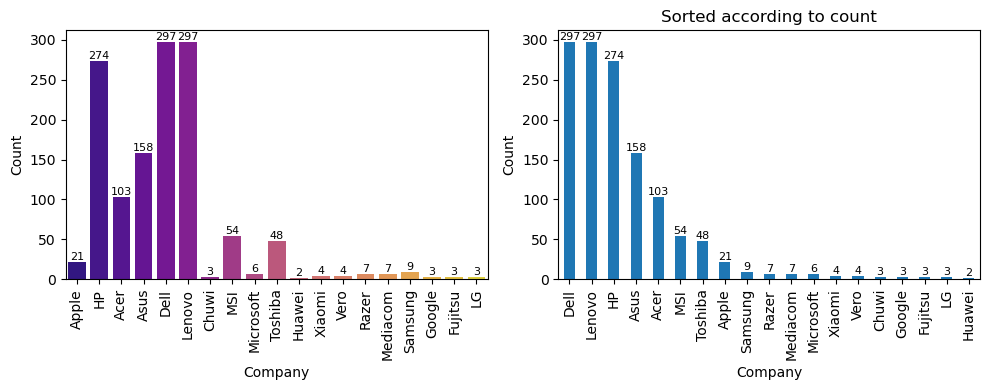

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot data on the first subplot
a = sns.countplot(x = "Company", data = data, ax=axes[0], palette='plasma')
axes[0].tick_params(axis='x', rotation=90)
axes[0].bar_label(a.containers[0], fontsize=8);
axes[0].set_title('')
axes[0].set_xlabel('Company')
axes[0].set_ylabel('Count')

# Plot data on the second subplot
a = data["Company"].value_counts().plot(kind= "bar", ax=axes[1])
axes[1].bar_label(a.containers[0], fontsize=8);
axes[1].set_title('Sorted according to count')
axes[1].set_xlabel('Company')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

**Observations:-**
- Dell, Lenovo & HP has the most number of laptop (around 300)

**`Company` vs. `Price`**

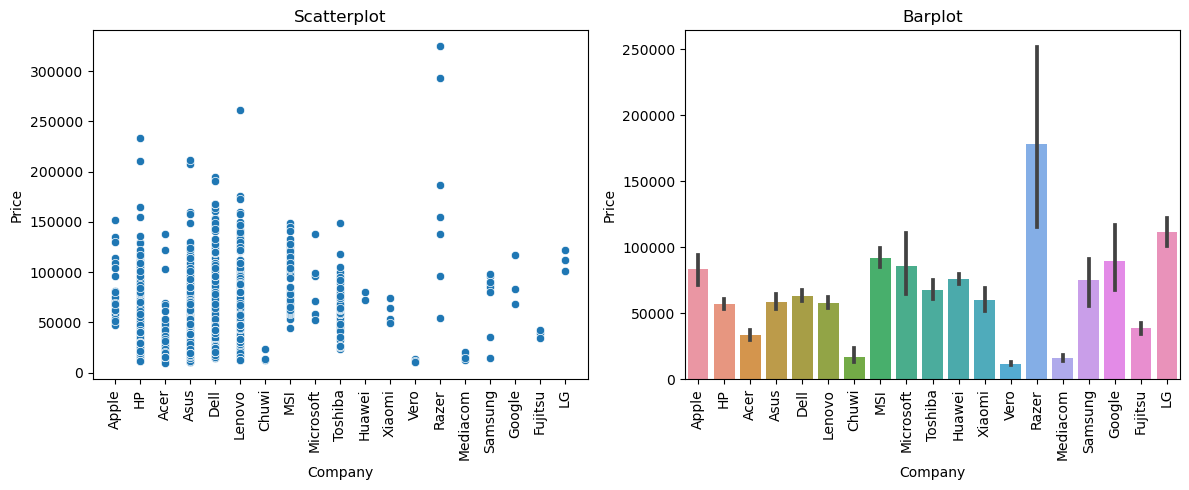

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot data on the first subplot
a = sns.scatterplot(x= "Company", y= "Price", data = data, ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Scatterplot')
axes[0].set_xlabel('Company')
axes[0].set_ylabel('Price')

# Plot data on the second subplot
a = sns.barplot(x= "Company", y= "Price", data = data, ax=axes[1])
# axes[1].bar_label(a.containers[0], fontsize=8)
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_title('Barplot')
axes[1].set_xlabel('Company')
axes[1].set_ylabel('Price')

# Adjust layout
plt.tight_layout()

**Observations:-**  
- By the above Scatterplot and Barplot we can clearly see that `Razer` Company has the highest price of the laptop
- Price of the laptop expect Razer company are below 1,20,000 

## TypeName (Categorical column)

In [18]:
data["TypeName"].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

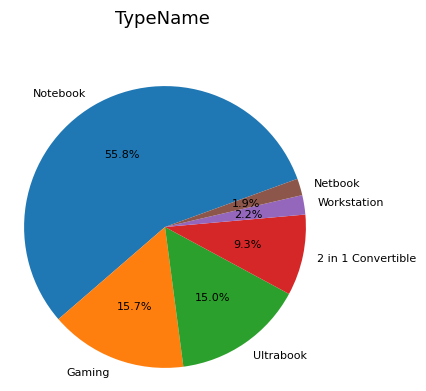

In [19]:
# Creating pie chart
plt.figure(figsize=(4, 4))
plt.pie(data["TypeName"].value_counts().values, labels=data["TypeName"].value_counts().index, textprops = {"fontsize":8}, autopct='%1.1f%%', startangle = 20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('TypeName \n\n', fontdict={'fontsize': 13});

**Observations:-**
- Most choosen laptop is `Notebook` around 55.8%

**`TypeName` vs. `Price`**

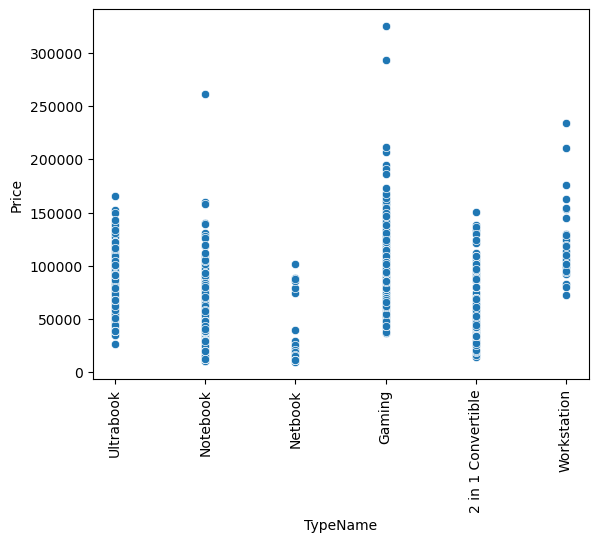

In [20]:
sns.scatterplot(x= data["TypeName"], y = data["Price"])
plt.xticks(rotation = 90);

**Obseravation:-**
- The price of Notebook is less compared to other types of laptop, might be the reason people purchase more Notebook  
- Some of the gaming laptop has a price around 3 lakhs 

## Inches

In [21]:
data["Inches"].value_counts()

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

**`Inches` vs. `Price`**

<Axes: xlabel='Inches', ylabel='Price'>

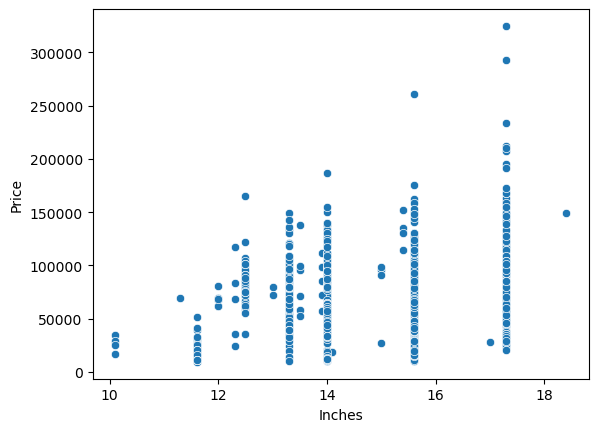

In [22]:
sns.scatterplot(x = data["Inches"] , y =data["Price"])

**Obseravation:-**
- As the size of laptop incresing the price is also increasing

## ScreenResolution

In [23]:
data.ScreenResolution.value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

**Observation:-**
- if we notice every category has some common features like(1920x1080, 2560x1440....), we can create a new column out of it
- Also for touchscreen 


In [24]:
# Extracting resolution from ScreenResolution and assigning those values into new columns
data["Resolution"] = data["ScreenResolution"].apply(lambda x:x.split(" ")[-1])

In [25]:
data.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900


In [26]:
# Creating 2 more columns X_Resolution and Y_Resolution
data["X_Resolution"] = data["Resolution"].apply(lambda x:x.split("x")[0]).astype("int")
data["Y_Resolution"] = data["Resolution"].apply(lambda x:x.split("x")[1]).astype("int")

In [27]:
data.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Resolution,X_Resolution,Y_Resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900,1440,900


**Creating New column PPI**
PPI stands for "Pixels Per Inch." It is a measure of the pixel density on a display screen, typically used to describe the clarity and sharpness of an image or text. 

In the context of a laptop, PPI refers to the number of pixels that can be displayed per inch of the screen. A higher PPI generally indicates a sharper and clearer display, as there are more pixels packed into each inch. This can result in crisper text, more detailed images, and smoother graphics.

When comparing laptops, especially those with different screen sizes, PPI can be a useful metric to consider alongside resolution to gauge the quality of the display.
To find the Pixels Per Inch (PPI) of a laptop screen, you'll need to know two main pieces of information: the screen resolution and the physical dimensions of the screen. Once you have these details, you can use a simple formula to calculate the PPI.

Here's the formula:

$$ \text{PPI} = \sqrt{\frac{{\text{Horizontal Pixels}^2 + \text{Vertical Pixels}^2}}{{\text{Diagonal Size}^2}}} $$

In [28]:
data["PPI"] = (((data['X_Resolution']**2) + (data['Y_Resolution']**2))**0.5/data['Inches']).astype('float')

In [29]:
#Creating a function to check Touchscreen laptop
def CheckScreen(obj):
    for i in obj:
        if "Touchscreen" in obj:
            return 1
        else:
            return 0

In [30]:
# Creating a new column `TouchScreen` (1 for Touchscreen and 0 for else)
data["TouchScreen"] = data["ScreenResolution"].apply(CheckScreen)

In [31]:
data.sample(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Resolution,X_Resolution,Y_Resolution,PPI,TouchScreen
891,HP,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7500U 2.7GHz,16,256GB SSD,Intel HD Graphics 620,Windows 10,1.42,74538.72,3200x1800,3200,1800,276.053530,1
293,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.00,97449.12,1920x1080,1920,1080,141.211998,0


Percentage of Touchscreen Laptop: 14.735226400613968
Percentage of Non-Touchscreen Laptop: 85.26477359938603
--------------------------------------------------


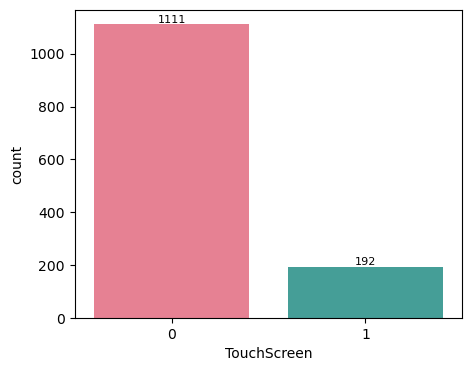

In [32]:
plt.figure(figsize=(5,4))
print(f"Percentage of Touchscreen Laptop: {(((data['TouchScreen'].value_counts())/len(data['TouchScreen']))*100)[1]}")
print(f"Percentage of Non-Touchscreen Laptop: {(((data['TouchScreen'].value_counts())/len(data['TouchScreen']))*100)[0]}")
print("-"*50)
a = sns.countplot(x = "TouchScreen", data = data ,  palette='husl')
a.bar_label(a.containers[0], fontsize=8);

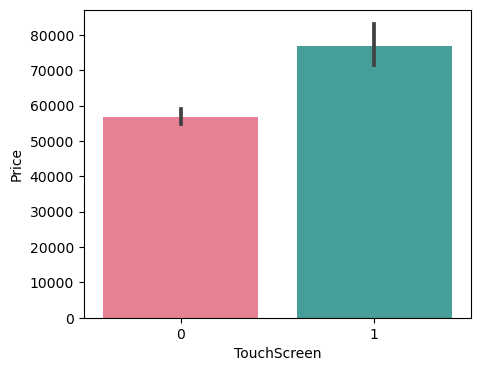

In [33]:
plt.figure(figsize=(5,4))
sns.barplot(x= "TouchScreen", y= "Price", data = data,  palette='husl');

**Observation:-**
- From the above barplot we can clearly say that `TouchScreen` laptop has higher price  

In [34]:
#Creating a function to check IPS Panel
def CheckIPS(obj):
    for i in obj:
        if "IPS Panel" in obj:
            return 1
        else:
            return 0

In [35]:
# Creating a new column `IPS` (1 for IPS Panel and 0 for else)
data["IPS"] = data["ScreenResolution"].apply(CheckIPS)

In [36]:
data.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Resolution,X_Resolution,Y_Resolution,PPI,TouchScreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600,2560,1600,226.983005,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900,1440,900,127.677940,0,0


Percentage of IPS Panel Laptop: 28.012279355333845
Percentage of Non-IPS Panel Laptop: 71.98772064466615
--------------------------------------------------


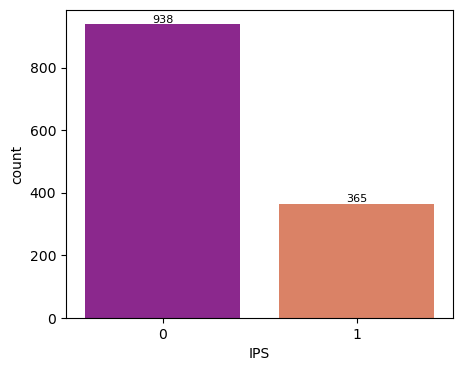

In [37]:
plt.figure(figsize=(5,4))
print(f"Percentage of IPS Panel Laptop: {(((data['IPS'].value_counts())/len(data['IPS']))*100)[1]}")
print(f"Percentage of Non-IPS Panel Laptop: {(((data['IPS'].value_counts())/len(data['IPS']))*100)[0]}")
print("-"*50)
a = sns.countplot(x = "IPS", data = data , palette = "plasma")
a.bar_label(a.containers[0], fontsize=8);

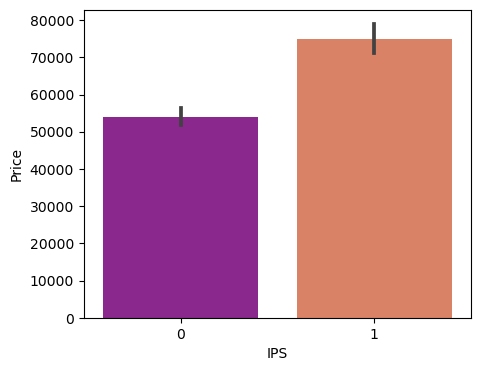

In [38]:
plt.figure(figsize=(5,4))
sns.barplot(x= "IPS", y= "Price", data = data, palette = "plasma");

**Observation:-**
- From the above barplot we can clearly say that `IPS Panel` laptop has higher price  

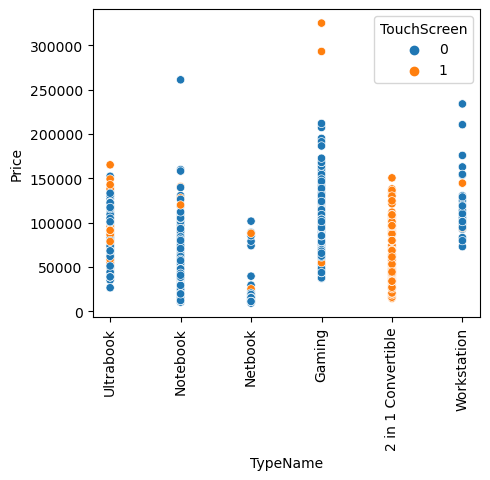

In [39]:
# Laptop types which has TouchScreen
plt.figure(figsize=(5,4))
sns.scatterplot(x= data["TypeName"], y = data["Price"],hue = data["TouchScreen"])
plt.xticks(rotation = 90);

**Observation:-**
- From the above scatterplot we can clearly say that `2 in 1 Convertible` laptop types are mostly TouchSccreen
- `Ultrabook` contain some laptops which is touchScreen
- Rest of the laptop types are mostly Non-TouchScreen

In [40]:
data.corr()["Price"]

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
X_Resolution    0.556529
Y_Resolution    0.552809
PPI             0.473487
TouchScreen     0.191226
IPS             0.252208
Name: Price, dtype: float64

**Observation:-**
- The correlation between (X_Resolution and Price), (Y_Resolution and Price) & (PPI and Price) are quite impressive 
- But we have made a new column `PPI` by using Inches, X_Resolution, Y_Resolution so we will drop these columns
- we will also drop `ScreenResolution` column , cuzz we have extracted all the info from that column

In [41]:
# Dropping ScreenResolution, Inches, X_Resolution, Y_Resolution
data.drop(columns = ["Inches","ScreenResolution","X_Resolution","Y_Resolution"] , inplace = True)

## Cpu

In [42]:
# Extracting First three words of `Cpu` colummn
data["CPU Name"] = data["Cpu"].apply(lambda x:x.split(" ")[:3])

In [43]:
# converting list to string 
data["CPU Name"] = data["CPU Name"].apply(lambda x: " ".join(x))

In [44]:
# Creating a function to extract Cpu brand 
def fetch_processor(obj):
    if obj == 'Intel Core i7' or obj == 'Intel Core i5' or obj == 'Intel Core i3':
        return obj
    else:
        if obj.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [45]:
# Creating new column CPU Brand
data["CPU Brand"] = data["CPU Name"].apply(fetch_processor)

In [46]:
# Creating one more new column by extracting `Cpu GHz`
data["CPU GHz"] = data["Cpu"].apply(lambda x:x.split(" ")[-1])

# Removing GHz from the `CPU GHz` column
data["CPU GHz"] = (data["CPU GHz"].str.replace("GHz","")).astype(float)

In [47]:
# Dropping Cpu column
data.drop(columns = ["Cpu", "CPU Name"] , inplace = True)

Percentage of Intel Core i7  Laptop: 40.44512663085188
Percentage of Intel Core i5  Laptop: 32.46354566385265
Percentage of Other Intel Processor  Laptop: 4.834996162701458
Percentage of Intel Core i3  Laptop: 10.437452033768228
Percentage of AMD Processor  Laptop: 11.818879508825788
--------------------------------------------------


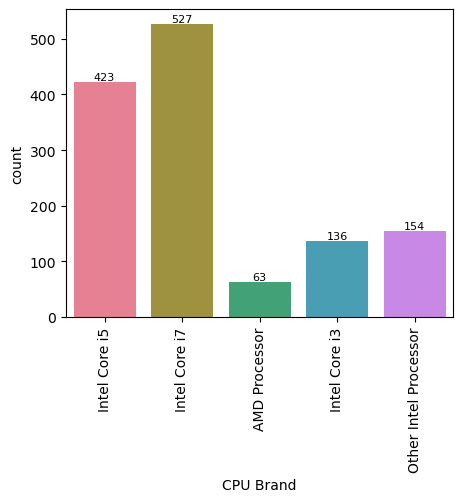

In [48]:
plt.figure(figsize=(5,4))
print(f"Percentage of Intel Core i7  Laptop: {(((data['CPU Brand'].value_counts())/len(data['CPU Brand']))*100)[0]}")
print(f"Percentage of Intel Core i5  Laptop: {(((data['CPU Brand'].value_counts())/len(data['CPU Brand']))*100)[1]}")
print(f"Percentage of Other Intel Processor  Laptop: {(((data['CPU Brand'].value_counts())/len(data['CPU Brand']))*100)[4]}")
print(f"Percentage of Intel Core i3  Laptop: {(((data['CPU Brand'].value_counts())/len(data['CPU Brand']))*100)[3]}")
print(f"Percentage of AMD Processor  Laptop: {(((data['CPU Brand'].value_counts())/len(data['CPU Brand']))*100)[2]}")
print("-"*50)
a = sns.countplot(x = "CPU Brand", data = data ,  palette='husl')
plt.xticks(rotation = 90)
a.bar_label(a.containers[0], fontsize=8);

`CPU Brand` vs. `Price`

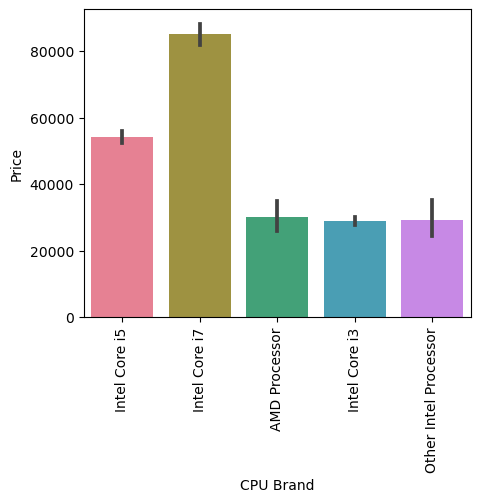

In [49]:
plt.figure(figsize=(5,4))
sns.barplot(x= "CPU Brand", y= "Price", data = data,  palette='husl')
plt.xticks(rotation = 90);

**Observation:-**
- From the above barplot we can clearly say that `Intel Core i7` laptop has the highest price
- AMD Processor, Intel Core i3 & Other Intel Processor belongs to similar price range

## Ram (Numerical column)

In [50]:
(((data["Ram"].value_counts())/len(data["Ram"]))*100)


8     47.505756
4     28.779739
16    15.349194
6      3.146585
12     1.918649
2      1.688411
32     1.304682
24     0.230238
64     0.076746
Name: Ram, dtype: float64

Percentage of 2GB  Laptop: 1.688411358403684
Percentage of 4GB  Laptop: 28.779739063699157
Percentage of 6GB  Laptop: 3.1465848042977744
Percentage of 8GB  Laptop: 47.50575594781274
Percentage of 12GB  Laptop: 1.918649270913277
Percentage of 16GB  Laptop: 15.349194167306216
Percentage of 24GB  Laptop: 0.23023791250959325
Percentage of 32GB  Laptop: 1.3046815042210285
Percentage of 64GB  Laptop: 0.07674597083653108
--------------------------------------------------


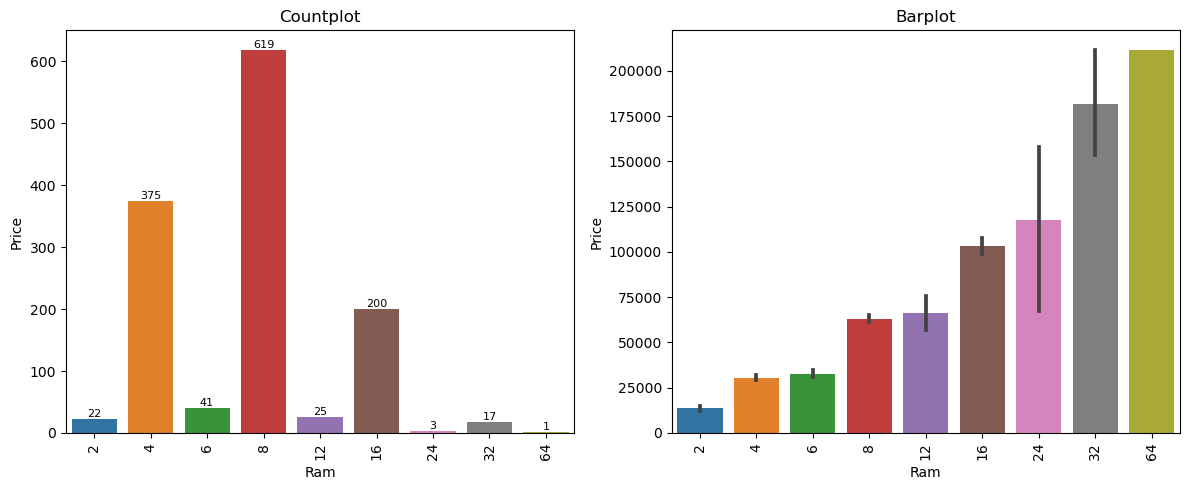

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

print(f"Percentage of 2GB  Laptop: {(((data['Ram'].value_counts())/len(data['Ram']))*100)[2]}")
print(f"Percentage of 4GB  Laptop: {(((data['Ram'].value_counts())/len(data['Ram']))*100)[4]}")
print(f"Percentage of 6GB  Laptop: {(((data['Ram'].value_counts())/len(data['Ram']))*100)[6]}")
print(f"Percentage of 8GB  Laptop: {(((data['Ram'].value_counts())/len(data['Ram']))*100)[8]}")
print(f"Percentage of 12GB  Laptop: {(((data['Ram'].value_counts())/len(data['Ram']))*100)[12]}")
print(f"Percentage of 16GB  Laptop: {(((data['Ram'].value_counts())/len(data['Ram']))*100)[16]}")
print(f"Percentage of 24GB  Laptop: {(((data['Ram'].value_counts())/len(data['Ram']))*100)[24]}")
print(f"Percentage of 32GB  Laptop: {(((data['Ram'].value_counts())/len(data['Ram']))*100)[32]}")
print(f"Percentage of 64GB  Laptop: {(((data['Ram'].value_counts())/len(data['Ram']))*100)[64]}")
print("-"*50)
# Plot data on the first subplot
a = sns.countplot(x= "Ram", data = data, ax=axes[0])
axes[0].bar_label(a.containers[0], fontsize=8)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Countplot')
axes[0].set_xlabel('Ram')
axes[0].set_ylabel('Price')

# Plot data on the second subplot
a = sns.barplot(x= "Ram", y= "Price", data = data, ax=axes[1])
# axes[1].bar_label(a.containers[0], fontsize=8)
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_title('Barplot')
axes[1].set_xlabel('Ram')
axes[1].set_ylabel('Price')

# Adjust layout
plt.tight_layout()

**Observation:-**
- Most people prefer buying 8GB laptop 
- 8GB Ram is budget friendly, might be the reason people prefer buying 

## Memory

In [52]:
# creating function ot extract SSD
def fetch_SSD(obj):
    for i in obj:
        if "SSD" in obj:
            return obj.split(" SSD")[0].replace("GB" ,"").replace("1TB","1024")
        else:
            return 0

In [53]:
# Creating new column `SSD`
data["SSD"] = data["Memory"].apply(fetch_SSD).astype(int)

In [54]:
# creating function to extract HDD
def fetch_HDD(obj):
    for i in obj:
        if "HDD" in obj:
            a = obj.replace("128GB SSD +" , " ").replace("256GB SSD +" , " ").replace("512GB SSD +" , " ").replace("1TB SSD +" , " ").replace("64GB Flash Storage +" , " ")
            return a.split("HDD")[0].replace("1TB","1024").replace("2TB","2048").replace("GB","").replace("1.0TB","1024").replace(" ","")
        else:
            return 0

In [55]:
# Creating new column `HDD`
data["HDD"] = data["Memory"].apply(fetch_SSD).astype(int)

In [56]:
# creating function to extract Flash Storage
def fetch_FlashStorage(obj):
    for i in obj:
        if "Flash Storage" in obj:
            return obj.split(" Flash Storage")[0].replace("GB","")
        else:
            return 0

In [57]:
# Creating new column `FlashStorage`
data["FlashStorage"] = data["Memory"].apply(fetch_FlashStorage).astype(int)

In [58]:
# creating function to extract `Hybrid`
def fetch_Hybrid(obj):
    for i in obj:
        if "Hybrid" in obj:
            return obj.split("Hybrid")[0].replace("TB","").replace("512GB SSD +  ","").replace("256GB SSD +  ","").replace("GB","").replace("1.0","1024")
        else:
            return 0

In [59]:
# Creating new column `Hybrid`
data["Hybrid"] = data["Memory"].apply(fetch_Hybrid).astype(int)

**Dropping `Memory` column**

In [60]:
data.drop("Memory" , axis = 1 , inplace = True)

In [61]:
data.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Resolution,PPI,TouchScreen,IPS,CPU Brand,CPU GHz,SSD,HDD,FlashStorage,Hybrid
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600,226.983005,0,1,Intel Core i5,2.3,128,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900,127.677940,0,0,Intel Core i5,1.8,0,0,128,0


In [62]:
# checking correlation 
print(data.corr()["Price"])

Ram             0.743007
Weight          0.210370
Price           1.000000
PPI             0.473487
TouchScreen     0.191226
IPS             0.252208
CPU GHz         0.430293
SSD             0.675986
HDD             0.675986
FlashStorage   -0.040511
Hybrid          0.008011
Name: Price, dtype: float64


In [63]:
# Dropping `FlashStorage` & `Hybrid` as it doesn't have a good corrrelation with Price
data.drop(columns=["FlashStorage" ,"Hybrid"], inplace = True)

In [64]:
data.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Resolution,PPI,TouchScreen,IPS,CPU Brand,CPU GHz,SSD,HDD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600,226.983005,0,1,Intel Core i5,2.3,128,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900,127.677940,0,0,Intel Core i5,1.8,0,0


## Gpu

In [65]:
data['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [66]:
data['Gpu brand'] = data['Gpu'].apply(lambda x:x.split()[0])

In [67]:
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Resolution,PPI,TouchScreen,IPS,CPU Brand,CPU GHz,SSD,HDD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600,226.983005,0,1,Intel Core i5,2.3,128,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900,127.677940,0,0,Intel Core i5,1.8,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,1920x1080,141.211998,0,0,Intel Core i5,2.5,256,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880x1800,220.534624,0,1,Intel Core i7,2.7,512,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560x1600,226.983005,0,1,Intel Core i5,3.1,256,256,Intel


In [68]:
data = data[data['Gpu brand'] != 'ARM']

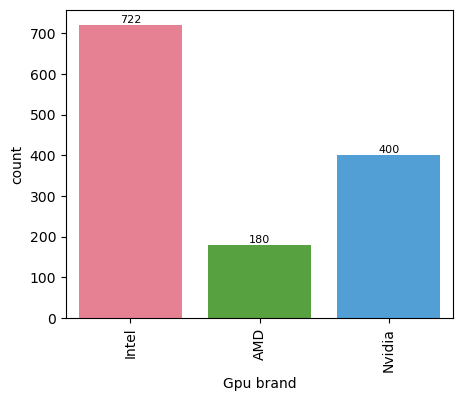

In [69]:
plt.figure(figsize=(5,4))
a = sns.countplot(x = "Gpu brand", data = data ,  palette='husl')
plt.xticks(rotation = 90)
a.bar_label(a.containers[0], fontsize=8);

**`Gpu brand` vs. `Price`**

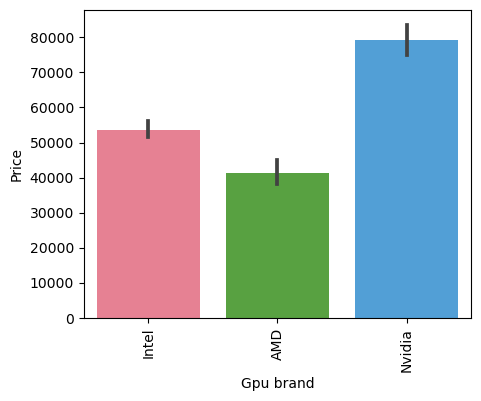

In [70]:
plt.figure(figsize=(5,4))
sns.barplot(x= "Gpu brand", y= "Price", data = data,  palette='husl')
plt.xticks(rotation = 90);

**Observation:-**
- Nvidia processor is expensive 

In [71]:
data.drop(columns=["Gpu"], inplace = True)

## OpSys

In [72]:
data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [73]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [74]:
# Creating new column os
data['os'] = data['OpSys'].apply(cat_os)

In [75]:
# Dropping OpSys column
data.drop(columns=['OpSys'],inplace=True)

In [147]:
# Dropping OpSys column
data.drop(columns=['Resolution'],inplace=True)

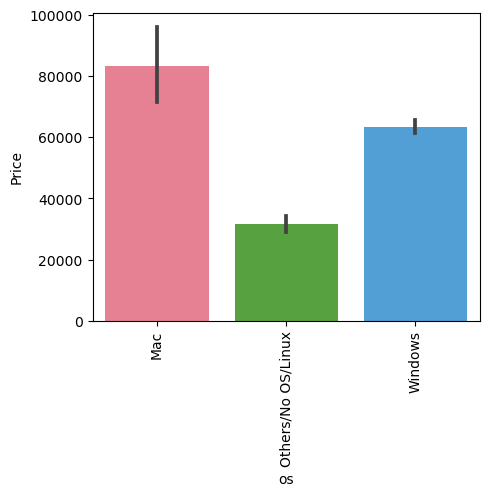

In [76]:
plt.figure(figsize=(5,4))
sns.barplot(x=data['os'],y=data['Price'], palette="husl")
plt.xticks(rotation='vertical')
plt.show()

## Weight

<Axes: xlabel='Weight', ylabel='Density'>

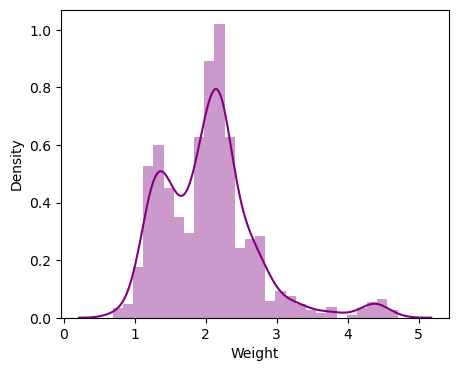

In [77]:
# creating distplot
plt.figure(figsize=(5,4))
sns.distplot(data["Weight"], color='purple')

<Axes: xlabel='Weight', ylabel='Price'>

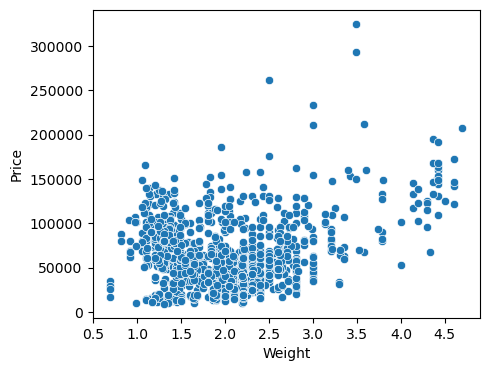

In [78]:
#  Creating scatterplot
plt.figure(figsize=(5,4))
sns.scatterplot(x=data['Weight'],y=data['Price'])

In [79]:
data.corr()["Price"]

Ram            0.742905
Weight         0.209867
Price          1.000000
PPI            0.475368
TouchScreen    0.192917
IPS            0.253320
CPU GHz        0.430122
SSD            0.675849
HDD            0.675849
Name: Price, dtype: float64

<Axes: >

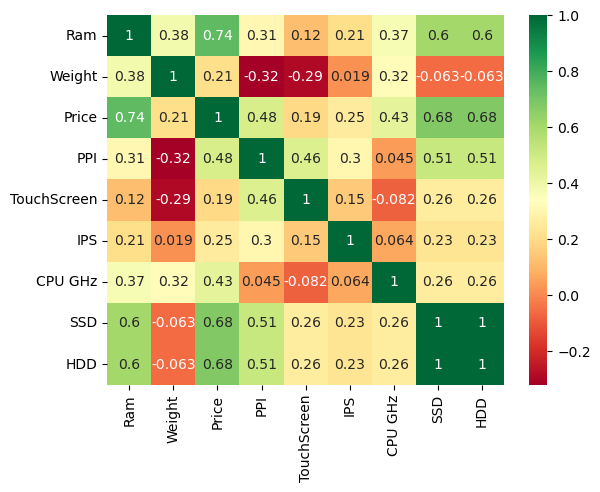

In [80]:
#  Heatmap to see correlation between variables
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

**Separating Independent Variables(X) and Dependent Variable(y)**  

In [163]:
X = data.drop(columns = ["Price"])
y = np.log(data["Price"])

In [164]:
X.head()

,Company,TypeName,Ram,Weight,PPI,TouchScreen,IPS,CPU Brand,CPU GHz,SSD,HDD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,226.983005,0,1,Intel Core i5,2.3,128,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,127.677940,0,0,Intel Core i5,1.8,0,0,Intel,Mac
2,HP,Notebook,8,1.86,141.211998,0,0,Intel Core i5,2.5,256,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,220.534624,0,1,Intel Core i7,2.7,512,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,226.983005,0,1,Intel Core i5,3.1,256,256,Intel,Mac


In [165]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [175]:
X["PPI"] = scaler.fit_transform(X.iloc[: , 4:5])
X["Weight"] = scaler.fit_transform(X.iloc[: , 3:4])
X["CPU GHz"] = scaler.fit_transform(X.iloc[: , 8:9])

In [176]:
from sklearn.preprocessing import LabelEncoder
LR = LabelEncoder()

In [177]:
X["Ram"] = LR.fit_transform(X["Ram"])
X["SSD"] = LR.fit_transform(X["SSD"])
X["HDD"] = LR.fit_transform(X["HDD"])

In [178]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

col = ["Company", "TypeName", "CPU Brand","Gpu brand","os"]

OHE = OneHotEncoder(drop = "first")
transformer = ColumnTransformer([("one_hot", OHE , col)], remainder = "passthrough")
transformed_X = transformer.fit_transform(X)

In [179]:
X = pd.DataFrame(transformed_X)

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=2)

In [181]:
from sklearn.linear_model import LinearRegression

# Create an instance of the Linear Regression model
model = LinearRegression()

# Your data preparation steps would come here
# For example, preparing your features and target variables

# Fit the model to your data
model.fit(X_train, y_train)

# Once the model is trained, you can use it to make predictions
predictions = model.predict(X_test)

# Evaluate the model using appropriate metrics
# For example, you can use mean squared error (MSE), R-squared, etc.

# Example of calculating mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.06698016958868505


In [182]:
from sklearn.metrics import r2_score

# Calculate R-squared score
r2 = r2_score(y_test, predictions)
print("R-squared Score:", r2)


R-squared Score: 0.824911845410034


In [183]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create an instance of the Random Forest Regressor model
model = RandomForestRegressor()

# Fit the model to your data
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate R-squared score
r2 = r2_score(y_test, predictions)
print("R-squared Score:", r2)


Mean Squared Error: 0.041957609136288335
R-squared Score: 0.8903215623401344


In [185]:
# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

# Load Boston housing dataset with missing values

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create AdaBoost regressor
ada_reg = AdaBoostRegressor()

# Fit AdaBoost regressor to the training data
ada_reg.fit(X_train_imputed, y_train)

# Make predictions
predictions = ada_reg.predict(X_test_imputed)

# Calculate R-squared score
r2 = r2_score(y_test, predictions)
print("R-squared Score:", r2)


R-squared Score: 0.8094129359283578


In [91]:
X_train.head()

,Company,TypeName,Ram,Weight,Resolution,PPI,TouchScreen,IPS,CPU Brand,CPU GHz,SSD,HDD,Gpu brand,os
183,Toshiba,Notebook,3,2.00,1366x768,100.454670,0,0,Intel Core i5,2.5,128,128,Intel,Windows
1141,MSI,Gaming,3,2.40,1920x1080,141.211998,0,0,Intel Core i7,2.8,128,128,Nvidia,Windows
1049,Asus,Netbook,1,1.20,1366x768,135.094211,0,0,Other Intel Processor,1.6,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,1,2.08,1920x1080,141.211998,1,1,Intel Core i3,2.3,0,0,Intel,Windows
878,Dell,Notebook,1,2.18,1920x1080,141.211998,0,0,Intel Core i5,2.5,128,128,Nvidia,Windows


In [ ]:
from sklearn.preprocessing import OneHotEncoder


<Axes: xlabel='Price', ylabel='Density'>

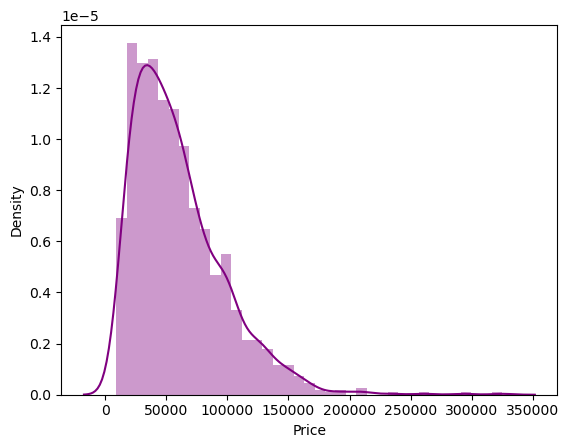

In [88]:
sns.distplot(data["Price"], color='purple')